<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [6]:
## Import Libraries
!pip install spacy
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
#import nltk


## Load data

In [9]:
## Loading the data

input_file = 'ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [10]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

In [12]:
#work the data 

In [17]:
# ANSWER
text = re.sub(r'["=]','',text)
print(text[:1000])         

Hello, this is an example text e' with emoticons :-) and special symbols!


## Helper method

In [18]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [19]:
# load spaCy and the English model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 10.0 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 21.2 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 25.6 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 32.3 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 33.5 MB/s eta 0:00:01
     --------------------------------- ----- 10.9/12.8 MB 40.9 MB/s eta 0:00:01
     ------------------------------------- - 12.3/12.8 MB 40.9 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 28.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Tokenise

In [25]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'This'
 2| 'is'
 3| 'an'
 4| 'example'
 5| 'sentence'
 6| '.'


In [22]:
or 

nlp = spacy.load("en_core_web_sm")

# Example text
text = 'This is an example sentence. It has spaCy tokenization. Stop here.'

# Tokenize using SpaCy
doc = nlp(text)

# Display tokenized results and stop when a period is encountered
for i, token in enumerate(doc):
    print('%2d| %r' % (i + 1, token.text))
    if token.text == '.':
        break

 1| 'This'
 2| 'is'
 3| 'an'
 4| 'example'
 5| 'sentence'
 6| '.'


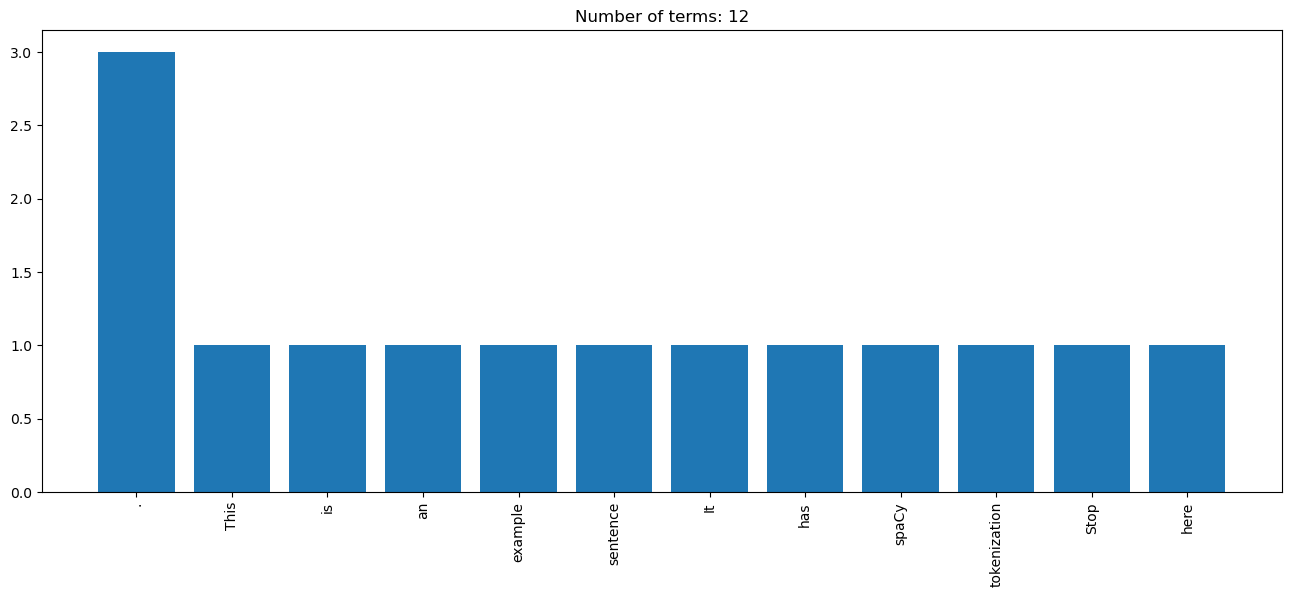

In [27]:
plot_words(t.text for t in doc)


### Stop Words

In [28]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'This'          ''
 2| 'is'            ''
 3| 'an'            ''
 4| 'example'       'example'
 5| 'sentence'      'sentence'
 6| '.'             '.'


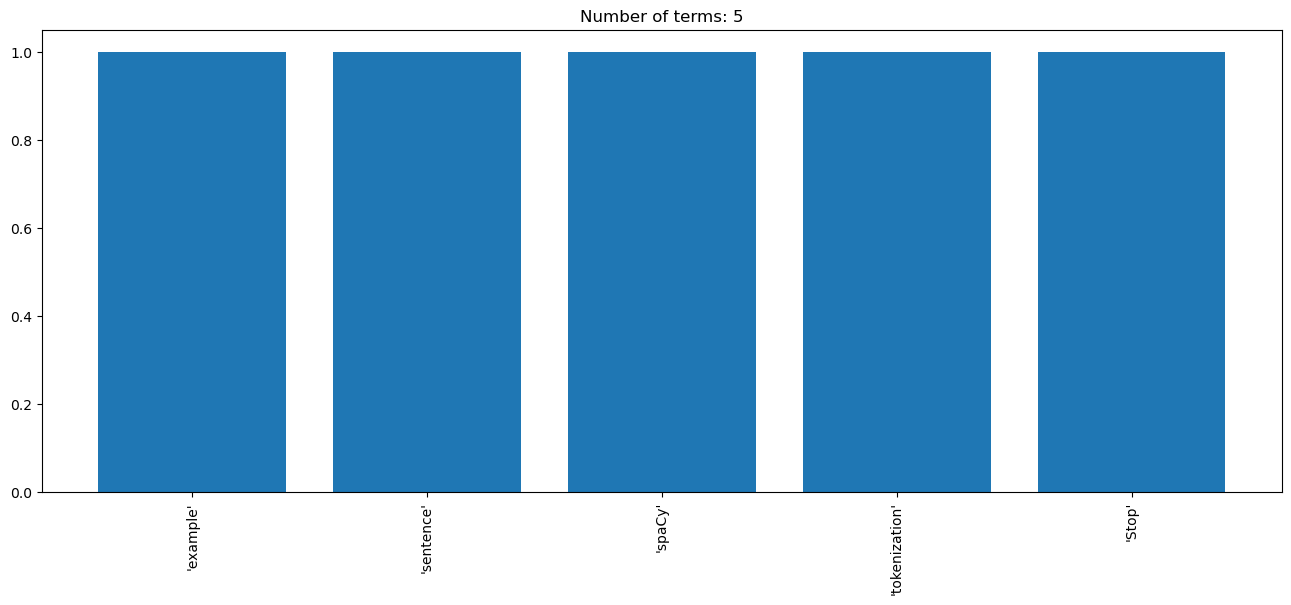

In [24]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [29]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'This'       : PRON  DT
 2|'is'         : AUX   VBZ
 3|'an'         : DET   DT
 4|'example'    : NOUN  NN
 5|'sentence'   : NOUN  NN
 6|'.'          : PUNCT .


### Lemmatization

In [30]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'This'       'this'
 2| 'is'         'be'
 3| 'an'         'an'
 4| 'example'    'example'
 5| 'sentence'   'sentence'
 6| '.'          '.'


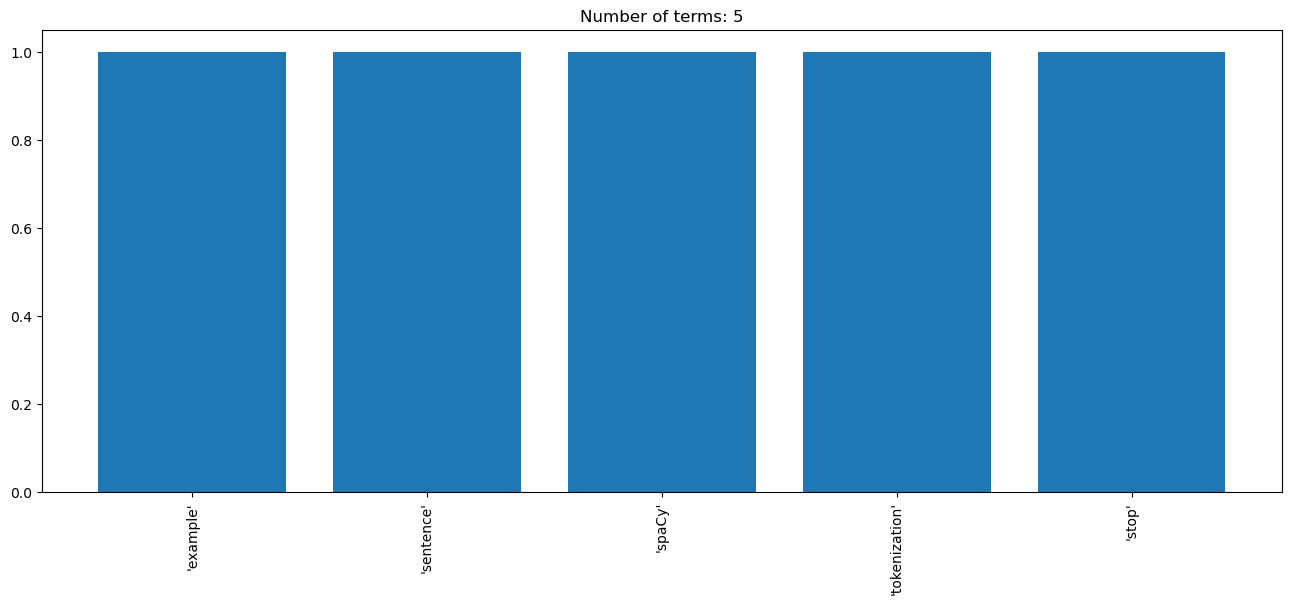

In [31]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [32]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: This is an example sentence.
 1: It has spaCy tokenization.
 2: Stop here.


## Extra: Using NLTK for NLP

### Tokenise

In [41]:
!pip install nltk

import nltk

In [42]:
# use nltk to find tokens
nltk.download('punkt')

tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'This'
 2| 'is'
 3| 'an'
 4| 'example'
 5| 'sentence'
 6| '.'
 7| 'It'
 8| 'has'
 9| 'NLTK'
10| 'tokenization'
11| '.'
12| 'Fix'
13| 'the'
14| 'error'
15| '.'


[nltk_data] Downloading package punkt to C:\Users\Renee
[nltk_data]     Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


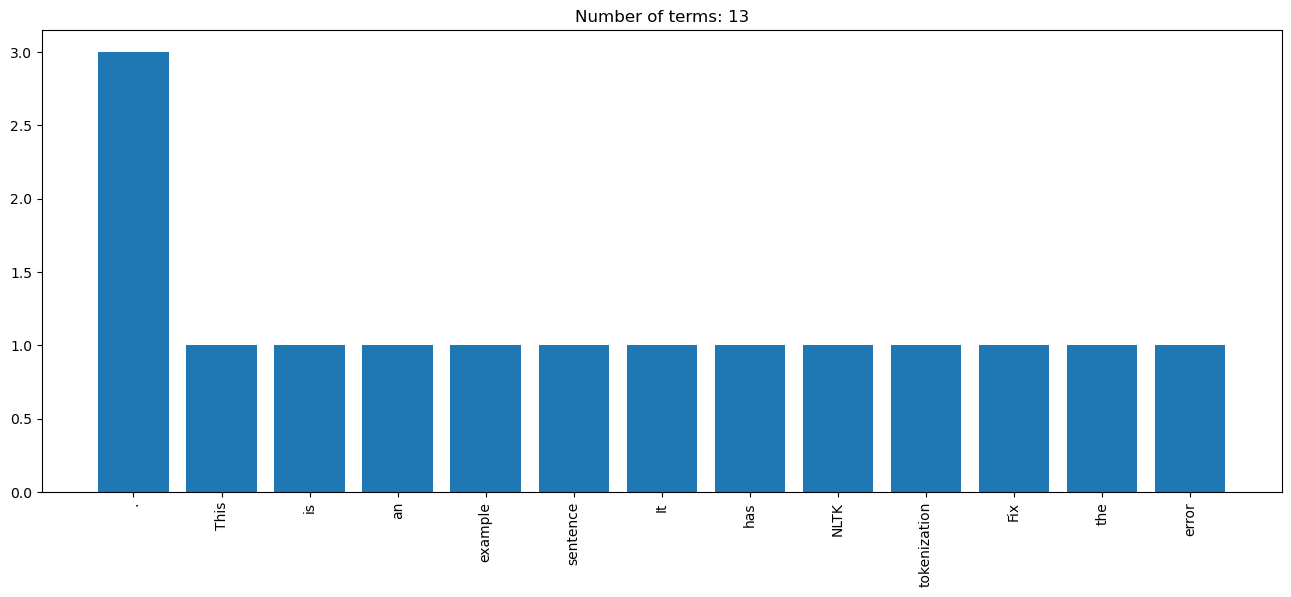

In [43]:
plot_words(tokens)

### Stop words

In [44]:
#nltk.download('stopwords') 
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

[nltk_data] Downloading package stopwords to C:\Users\Renee
[nltk_data]     Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [46]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords] # create a list of tokens withOUT the stop words

In [48]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'This'         
 2| 'is'           
 3| 'an'           
 4| 'example'       'example'
 5| 'sentence'      'sentence'
 6| '.'             '.'


In [ ]:
# Create plot of words without stopword
# ANSWER

### Check Part of Speech

In [51]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [52]:
## nltk
import nltk
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'This'       : DT   determiner
 2|'is'         : VBZ  verb, 3rd person sing. present takes
 3|'an'         : DT   determiner
 4|'example'    : NN   noun, singular "desk"
 5|'sentence'   : NN   noun, singular "desk"
 6|'.'          : .    -
 7|'It'         : PRP  personal pronoun I, he, she
 8|'has'        : VBZ  verb, 3rd person sing. present takes
 9|'NLTK'       : VBN  verb, past participle taken
10|'tokenization' : NN   noun, singular "desk"
11|'.'          : .    -
12|'Fix'        : NNP  proper noun, singular "Harrison"
13|'the'        : DT   determiner
14|'error'      : NN   noun, singular "desk"
15|'.'          : .    -


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Renee Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Stemming

In [53]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatization

In [56]:
## nltk

import nltk
nltk.download('wordnet')

wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to C:\Users\Renee
[nltk_data]     Garrett\AppData\Roaming\nltk_data...


In [57]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'thi'          'This'      
 2| 'is'           'is'        
 3| 'an'           'an'        
 4| 'exampl'       'example'   
 5| 'sentence.'    'sentence.' 


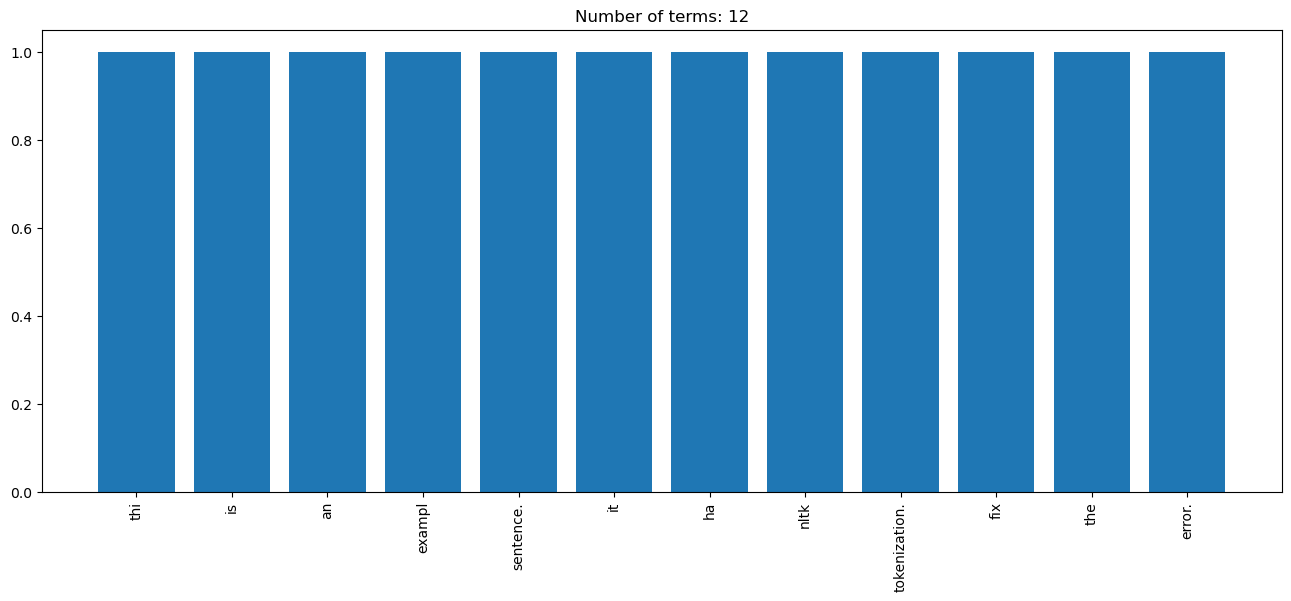

In [58]:
plot_words(stemmed.split())

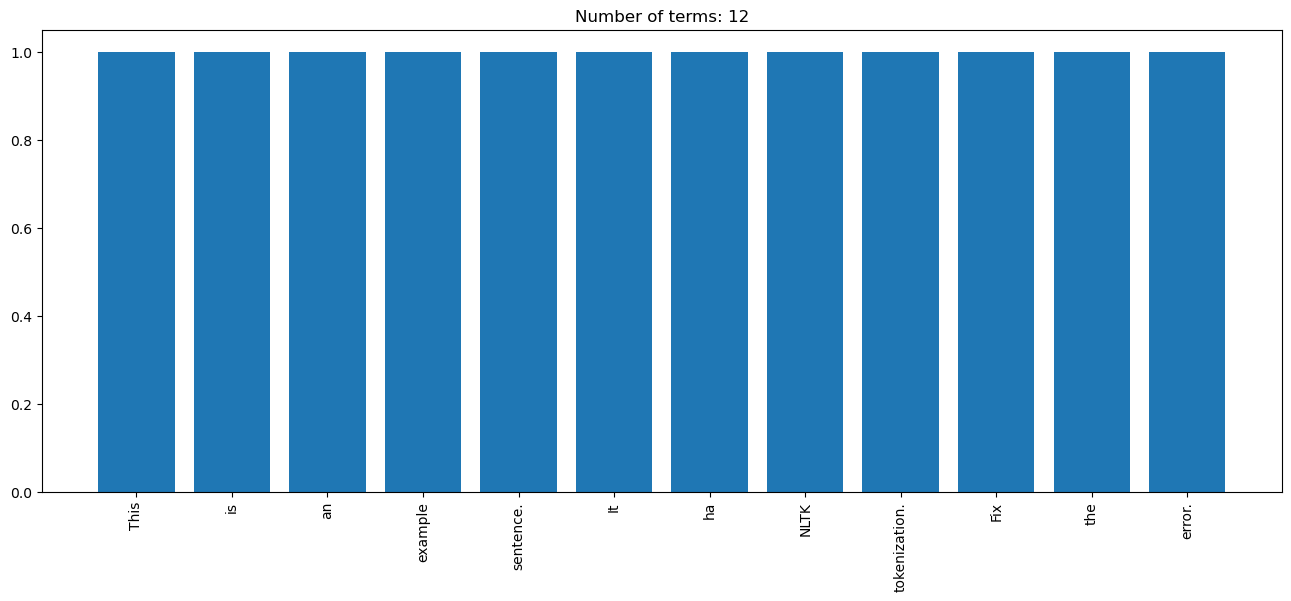

In [59]:
plot_words(lemma.split())

### Entity recognition

In [ ]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
PERSON      : History Construction
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Legacy Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Sta



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



